## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [33]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [34]:
df = pd.read_csv('C:\\Users\\chandan\\Desktop\\22copy\\uploads\\new.csv')

#### Show Top 5 Records

In [35]:
df.head()

,gender,university_type,extra_curricular,attendance,test_preparation_course,test_score,prep_score,final_score
0,male,public,dance,70,completed,55,57,57
1,male,private,drama,75,completed,89,90,91
2,male,public,dance,70,none,50,45,49
3,male,private,dance,70,completed,60,63,63
4,female,public,drama,65,completed,66,71,70


#### Preparing X and Y variables

In [36]:
X = df.drop(columns=['final_score'],axis=1)

In [37]:
X.head()

,gender,university_type,extra_curricular,attendance,test_preparation_course,test_score,prep_score
0,male,public,dance,70,completed,55,57
1,male,private,drama,75,completed,89,90
2,male,public,dance,70,none,50,45
3,male,private,dance,70,completed,60,63
4,female,public,drama,65,completed,66,71


In [38]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'university_type' variable:  ",end=" ")
print(df['university_type'].unique())

print("Categories in'extra_curricular' variable:",end=" " )
print(df['extra_curricular'].unique())

print("Categories in 'attendance' variable:     ",end=" " )
print(df['attendance'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['male' 'female']
Categories in 'university_type' variable:   ['public' 'private']
Categories in'extra_curricular' variable: ['dance' 'drama' 'music' 'volunteering activity' 'art' 'sports']
Categories in 'attendance' variable:      [70 75 65 95 60]
Categories in 'test_preparation_course' variable:      ['completed' 'none']


In [39]:
y = df['final_score']

In [40]:
y

0        57
1        91
2        49
3        63
4        70
       ... 
1996     66
1997     82
1998     90
1999    100
2000     58
Name: final_score, Length: 2001, dtype: int64

In [41]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [42]:
X = preprocessor.fit_transform(X)

In [43]:
X.shape

(2001, 15)

In [44]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1600, 15), (401, 15))

#### Create an Evaluate Function to give all metrics after model Training

In [45]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [46]:
models = {
    "Linear \nRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision\nTree": DecisionTreeRegressor(),
    "Random\nForest": RandomForestRegressor(),
    "XGB\nRegressor": XGBRegressor(), 
    "AdaBoost\nRegressor": AdaBoostRegressor(),
    "Catboost\nResgressor": CatBoostRegressor(),
    "Gradient\nBoosting":GradientBoostingRegressor()
}

estimators = [('gb', GradientBoostingRegressor()),
              ('lgbm', LGBMRegressor()),
              ('catboost', CatBoostRegressor())]

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')


Linear 
Regression
Model performance for Training set
- Root Mean Squared Error: 0.2984
- Mean Absolute Error: 0.2644
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2987
- Mean Absolute Error: 0.2707
- R2 Score: 0.9999


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0645
- Mean Absolute Error: 0.8712
- R2 Score: 0.9984
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1026
- Mean Absolute Error: 0.8817
- R2 Score: 0.9984


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2982
- Mean Absolute Error: 0.2641
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2976
- Mean Absolute Error: 0.2688
- R2 Score: 0.9999


Decision
Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
------------------------------

Random
Forest
Model performance for Training set
- Root Mean Squared Error: 0.1747
- Mean Absolute Error: 0.1074
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5544
- Mean Absolute Error: 0.3130
- R2 Score: 0.9996


XGB
Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1042
- Mean Absolute Error: 0.0781
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5581
- Mean Absolute Error: 0.3457
- R2 Score: 0.9996


AdaBoost
Regressor
Model performance for Training set
- Root Mean Squared Error: 1.8965
- Mean Absolute Error: 1.4039
- R2 Score: 0.9950
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.9787
- Mean Absolute Error: 1.3889
- R2 Score: 0.9948


Learning rate set to 0.044099
0:	learn: 25.8115934	total: 1.43ms	remaining: 1.43s
1:	learn: 24.7532868	total: 2.66ms	remaining: 1.33s
2:	learn: 23

### Results

In [47]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.999882
0,Linear \nRegression,0.999881
7,Catboost\nResgressor,0.999823
8,Gradient\nBoosting,0.999614
4,Random\nForest,0.999590
5,XGB\nRegressor,0.999584
3,Decision\nTree,0.999118
1,Lasso,0.998377
6,AdaBoost\nRegressor,0.994774


## Models Accuracy

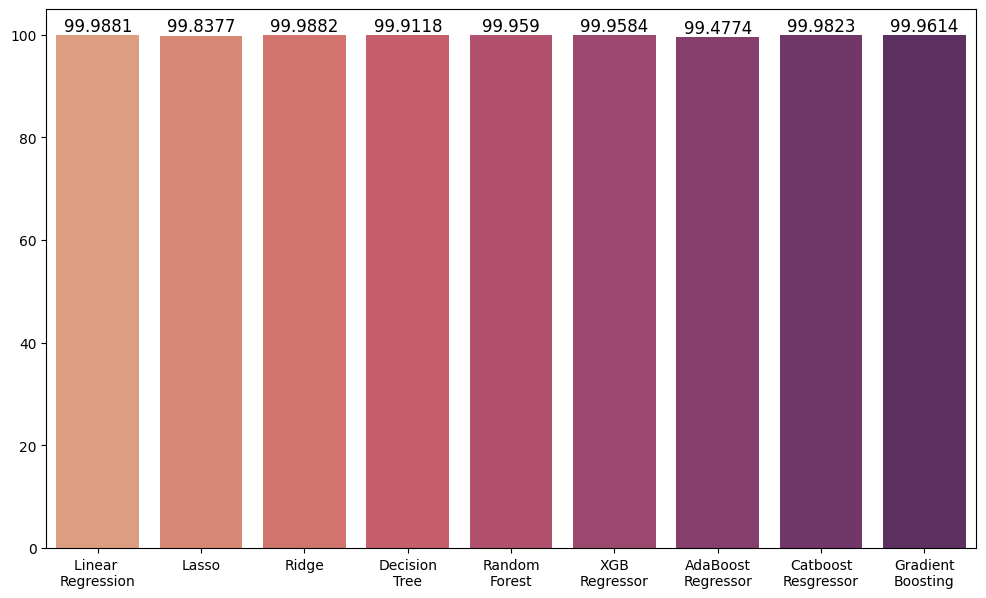

In [48]:
f,ax=plt.subplots(1,1,figsize=(12,7))
sns.barplot(x=model_list, y=[r2 * 100 for r2 in r2_list], hue=model_list, palette='flare', ax=ax, legend=False)
for container in ax.containers:
    ax.bar_label(container,color='black',size=12)
plt.savefig('C:\\Users\\chandan\\Desktop\\22copy\\static\\analysis\\accuracy.png')

## Linear Regression

In [49]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.99


## Decision Tress

In [50]:
lin_model1=DecisionTreeRegressor(random_state=0)
lin_model1=lin_model1.fit(X_train,y_train)
y_pred1=lin_model1.predict(X_test)
score1=r2_score(y_test,y_pred1)*100
print(" Accuracy of the model is %.2f" %score1)

 Accuracy of the model is 99.91


## Difference between Actual and Predicted Values

In [51]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1394,72,71.708984,0.291016
353,94,94.173828,-0.173828
1334,70,70.259766,-0.259766
906,97,97.144531,-0.144531
1290,80,80.185547,-0.185547
...,...,...,...
1285,29,28.791016,0.208984
914,32,32.195312,-0.195312
261,80,79.658203,0.341797
535,66,66.246094,-0.246094
